In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve


def load_data(file):
    """
    Função para carregamento de arquivo 
    
    """
    path = input('Por favor adicione o diretório de trabalho?')
    for dirname, _, filename in os.walk(path, topdown = True):
        for filename in filename:
            if filename == file:
                data = pd.read_csv(os.path.join(dirname,filename), header = None)
            else:
                pass
    print("Carregamento finalizado!!!")
    return data

X_treino = load_data('X_treino.csv')
y_treino = load_data('y_treino.csv')

Carregamento finalizado!!!
Carregamento finalizado!!!


In [14]:
def random_SGD(X_treino,y_treino,n_iter, model_name):
    
    print('> Procurando os melhores parametros...')
    loss = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']


    penalty = ['l2', 'l1','elasticnet']
    alpha = [0.000050] #[float(x) for x in np.linspace(0.00001, 0.001, num=7)]
    max_iter = [int(x) for x in np.linspace(500, 1500, num=5)]
    learning_rate = ['optimal']
   
    

    random_grid = {'penalty' : penalty,
                   'alpha':alpha,
                   'max_iter': max_iter,
                   'learning_rate': learning_rate}
    

    random_state = 2
    sgd = SGDClassifier(early_stopping=True)
    sgd_random = RandomizedSearchCV(estimator = sgd, param_distributions = random_grid, 
                                   n_iter = n_iter, cv = 3, verbose=1, random_state=random_state, 
                                   n_jobs = -1, scoring = {'roc_auc':'roc_auc'}, 
                                   refit='roc_auc')

    # Fit do modelo
    print('> Fitting Modelo...')
    model = sgd_random.fit(X_treino, y_treino)
    filename = model_name
    pickle.dump(model.best_estimator_, open(filename, 'wb'))
    
    print('> Treinamento realizado...')
    return model.best_estimator_, model.cv_results_, model.best_params_

In [15]:
trained_model, results, params=random_SGD(X_treino,y_treino,5, model_name='sgd_model_1801.sav')

> Procurando os melhores parametros...
> Fitting Modelo...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    5.7s finished
> Treinamento realizado...


In [16]:
#Melhores Parametros
params

{'penalty': 'l1', 'max_iter': 750, 'learning_rate': 'optimal', 'alpha': 5e-05}

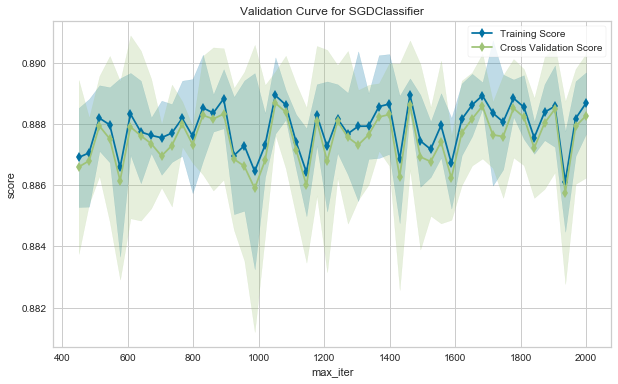

In [17]:
# Function
def validation_curve(model, X, y, param, rang, cv):
    
    f, ax  = plt.subplots(figsize=(10,6))
    viz = ValidationCurve(
    model, param_name=param,
    param_range=rang, cv=cv, scoring="roc_auc", n_jobs=-1
    )


    viz.fit(X, y)
    viz.show()
    plt.show()
    


validation_curve(trained_model, X_treino, y_treino, param='max_iter', rang=np.linspace(450,2000), cv=5)

In [10]:
#Treinando modelo com os parametros encontrados

def fitting_model_sgd(X, y, model_name, penalty ='l1', alpha = 0.000050
    max_iter = 500, learning_rate ='optimal'):
    
    
    sgd = SGDClassifier( penalty =penalty, alpha = alpha
    max_iter = max_iter, learning_rate =learning_rate, early_stopping=True)
    
    
    # Fit do modelo
    print('> Treinando Modelo...')
    model = sgd.fit(X, y)
    filename = model_name
    pickle.dump(model, open(filename, 'wb'))
    print('> Modelo Treinado...')
    return model

modelo = fitting_model_cart(X_treino, y_treino, 'sgd_model_1801.sav')

> Treinando Modelo...
> Modelo Treinado...
